In [2]:
#Import Necesary Libraries 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the MNIST Dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#Explore the dataset shape 
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


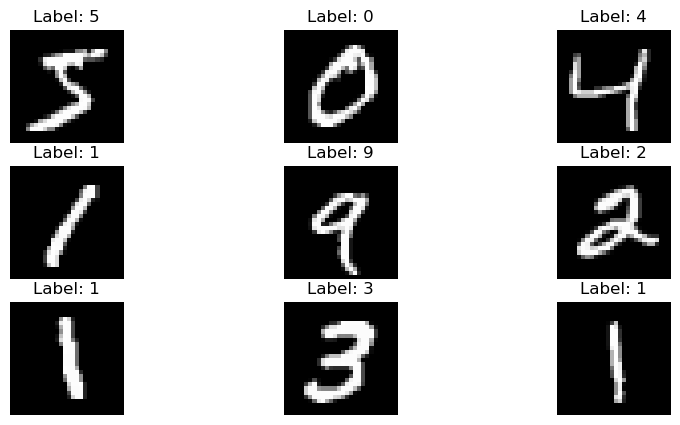

In [5]:
#Visualize the Dataset 
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
#preprocess the data 
#Normalize 
x_train = x_train / 255.0
x_test = x_test / 255.0
#reashpe images 
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
#convert labels to one-hot enconding 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
#Build the basic NN 
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])
#Compile and train the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

C:\Users\moham\anaconda3\envs\ai-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8757 - loss: 0.4351 - val_accuracy: 0.9574 - val_loss: 0.1382
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1219 - val_accuracy: 0.9713 - val_loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9770 - loss: 0.0794 - val_accuracy: 0.9728 - val_loss: 0.0879
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0588 - val_accuracy: 0.9706 - val_loss: 0.0974
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0450 - val_accuracy: 0.9726 - val_loss: 0.0841
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0327 - val_accuracy: 0.9777 - val_loss: 0.0719
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9776 - val_loss: 0.0745
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0220 - 

In [9]:
#Evaluate the model 
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.1084
Test Accuracy: 0.9757999777793884


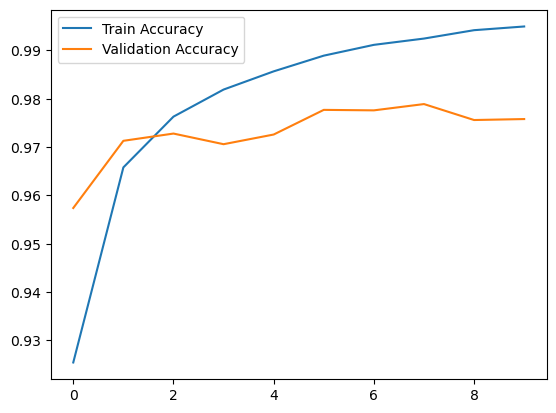

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

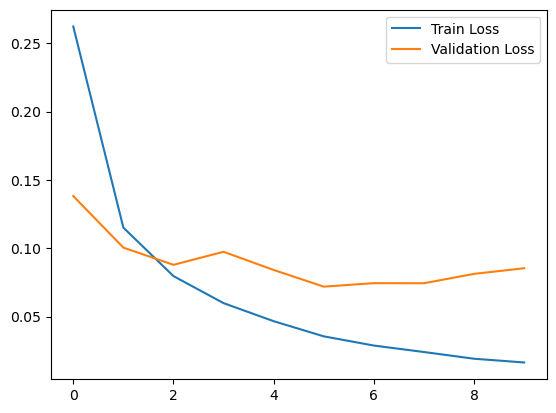

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


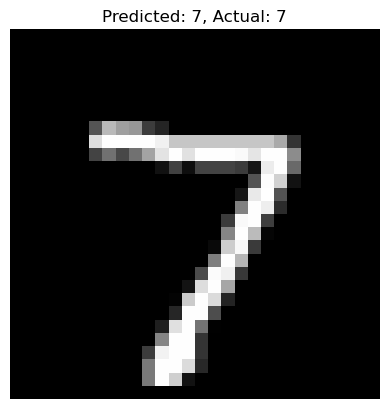

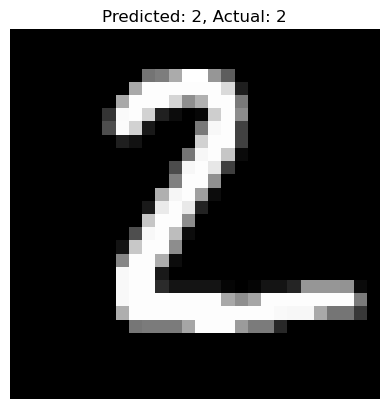

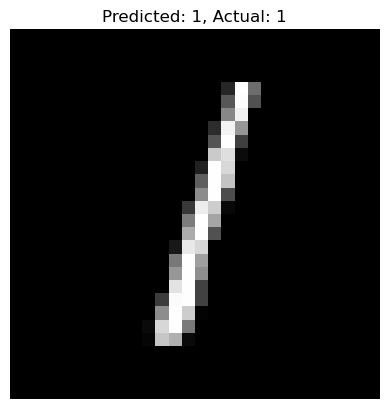

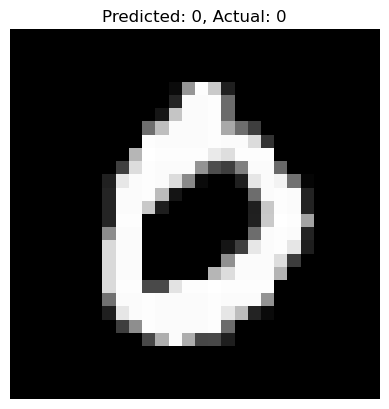

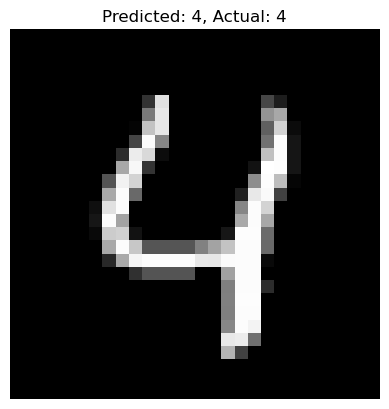

In [13]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()

In [14]:
incorrect = np.where(np.argmax(model.predict(x_test), axis=1) != np.argmax(y_test, axis=1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


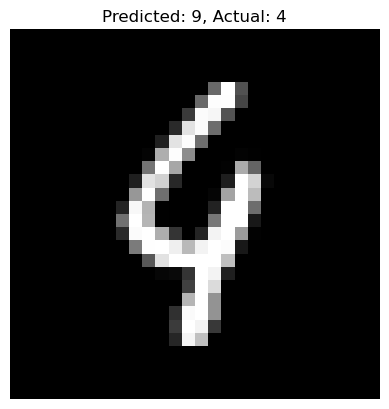

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


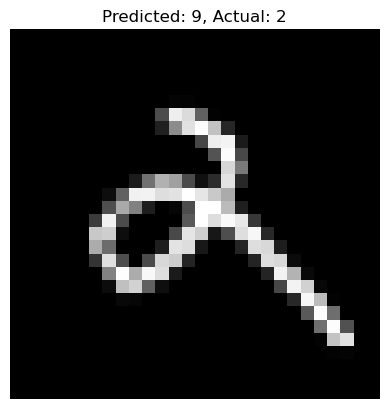

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


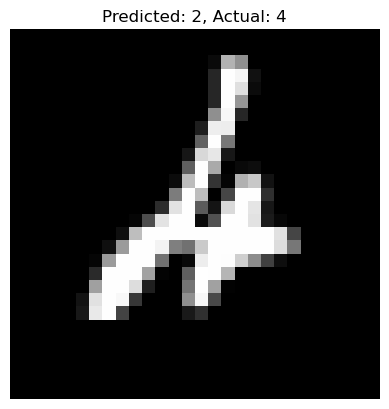

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


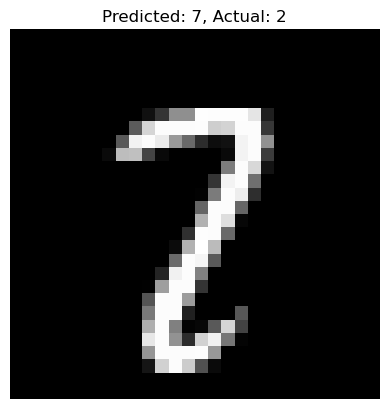

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


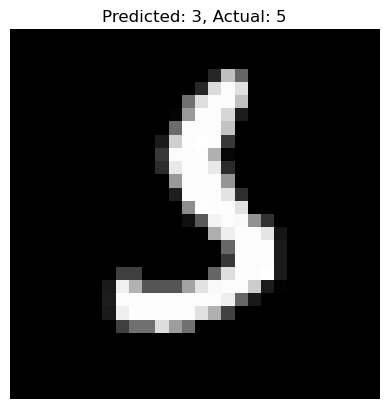

In [15]:
for i in range(5):
    plt.imshow(x_test[incorrect[i]].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(model.predict(x_test[incorrect[i]].reshape(1, 784)))}, Actual: {np.argmax(y_test[incorrect[i]])}")
    plt.axis('off')
    plt.show()

In [17]:
model.save("mnist_simple_model.h5")